In [4]:
import json
with open('../wordbank/objects.json', 'r') as fp:
    data = json.load(fp)
words = data['objects']
words.append("toast")
len(words)

448

In [5]:
#this will check if the word has a plural version in the list
#is there is, we will remove the plural vocab and keep the singular one
for word in words:
    if word + "s" in words:
        plural_v = word + "s" 
        print (plural_v)
        words.remove(plural_v)
len(words)

bananas
cars
carrots
keys


444

In [6]:
import spacy
nlp = spacy.load("en_core_web_md")

In [7]:
#vec() functions outputs the vector data of that word 
def vec(s):
    return nlp.vocab[s].vector
#dictionary that stores all vector data of all words
model = {}
for word in words:
    word_vec = vec(word)
    model[word] = word_vec

In [8]:
len(model)

444

In [9]:
#t-SNE model flatten and showcases the data
from sklearn.manifold import TSNE

In [10]:
import matplotlib.pyplot as plt
labels = []
tokens = []
reset_dict = {}
def tsne_plot(model): 

    for word in model:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    
    #clean duplicates and append to a new dictionary
    #grabbing the coordinates
    coordinates = {}
    for i in range(len(labels)):
        coordinates[labels[i]] = new_values[i].tolist()
        
    #creating a new dictionary
    #only appends the coordinate that doesn't have duplicated values in the original dict
    for key in coordinates:
        name = key
        if coordinates[key] not in reset_dict.values():
            reset_dict[name] = coordinates[key]
   
    #append back the coordinate for plot
    coordinate_new = []
    for v in reset_dict.values():
        coordinate_new.append(v)
    #append back the labels for plot
    label_new = []
    for key in reset_dict:
        label_new.append(key)

    for value in coordinate_new:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(label_new[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

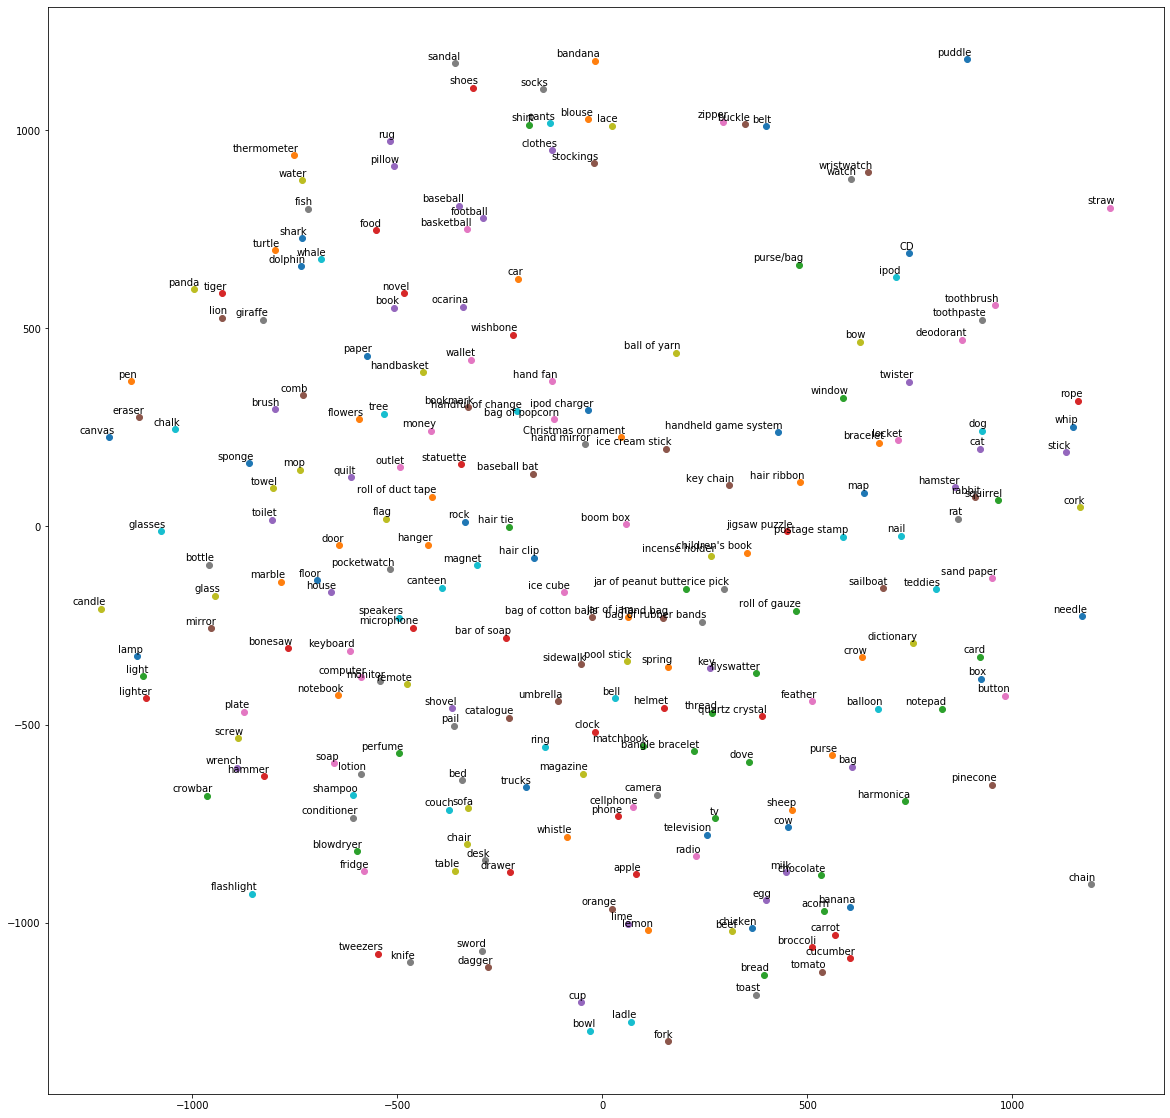

In [11]:
tsne_plot(model)

In [10]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)
len(new_values)

443

In [12]:
#check coordinate
reset_dict['toast']

[375.4123229980469, -1181.8135986328125]

#clean duplicates and append to a new dictionary
## below has been incorporated into the t-SNE model building function
-
coordinates = {}
for i in range(len(labels)):
    coordinates[labels[i]] = new_values[i].tolist()
reset_dict = {}
for key in coordinates:
    name = key
    if coordinates[key] not in reset_dict.values():
        reset_dict[name] = coordinates[key]
coordinate_new = []
for v in reset_dict.values():
    coordinate_new.append(v)
label_new = []
for key in reset_dict:
    label_new.append(key)

Saving to JSON file

In [93]:
import json
with open('json_export/bag_of_nouns.json', 'w') as fp:
    json.dump(reset_dict, fp)